In [1]:
import glob
import re
import os

from moviepy.editor import VideoFileClip

In [2]:
def process_line(line):
    parts = line.split('[')
    subparts = parts[1].split(':')

    part1 = parts[0].strip()

    cleaned_str = subparts[0].replace(']', '')
    start, end = cleaned_str.split('-')
    part2 = float(start), float(end)

    part3 = subparts[1].strip()

    return part1, part2, part3

In [3]:
def get_subclip(video, video_name, clip_name, time_frame):
    cut_video = video.subclip(time_frame[0], time_frame[1])
    width, height = cut_video.size

    if "F_" in clip_name:
        F_half = cut_video.crop(x1=100, y1=120, x2=width/2 - 20, y2=height-120)
        M_half = cut_video.crop(x1=width/2 + 100, y1=120, x2=width-20, y2=height-120)
    elif "M_" in clip_name:
        M_half = cut_video.crop(x1=100, y1=120, x2=width/2 - 20, y2=height-120)
        F_half = cut_video.crop(x1=width/2 + 100, y1=120, x2=width-20, y2=height-120)

    try: 
        if "_F" in clip_name:
            F_half.write_videofile(f"E:/IEMOCAP_full_release/Session5/video/{video_name}/{clip_name}.avi", codec='libx264', logger=None)
        elif "_M" in clip_name:
            M_half.write_videofile(f"E:/IEMOCAP_full_release/Session5/video/{video_name}/{clip_name}.avi", codec='libx264', logger=None)
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        if "_F" in clip_name:
            F_half.close()
        elif "_M" in clip_name:
            M_half.close()

In [4]:
def get_label(txt_path):
    with open(txt_path, "r") as f:
        for line in f:
            if not line.startswith("["):
                continue
            line = re.split("[\t\n]", line)
            wav_stem = line[1]
            label = line[2]
            print('label')
            print(label)

def print_labels():
    label_dir = "E:/IEMOCAP_full_release/Session1/label"
    label_paths = glob.glob(f"{label_dir}/*.txt")
    labels = []
    for label_path in label_paths:
        with open(label_path, "r") as f:
            for line in f:
                if not line.startswith("["):
                    continue
                line = re.split("[\t\n]", line)
                wav_stem = line[1]
                label = line[2]
                labels.append(label)
    return labels

In [5]:
labels = print_labels()
set(labels)

{'ang', 'dis', 'exc', 'fea', 'fru', 'hap', 'neu', 'oth', 'sad', 'sur', 'xxx'}

https://arxiv.org/pdf/2205.08383.pdf

"On the basis of not being useful labels we
remove all samples labeled as 'xxx' and 'other'. On
the basis of having too small of a sample size we remove the samples labeled as: 'surprised', 'fearful','disgusted'. Lastly, similar to previous work on the
IEMOCAP dataset ([17, 16, 23]), we merge the "excited" and "happy" classes into a single class for which
we use the "happy" label. As a result, the final dataset
contains 7380 samples, with a class breakdown shown in
table 1. All classes are balanced, with a roughly 50/50
gender split."

{'ang', 'fru', 'hap', 'neu', 'sad'}

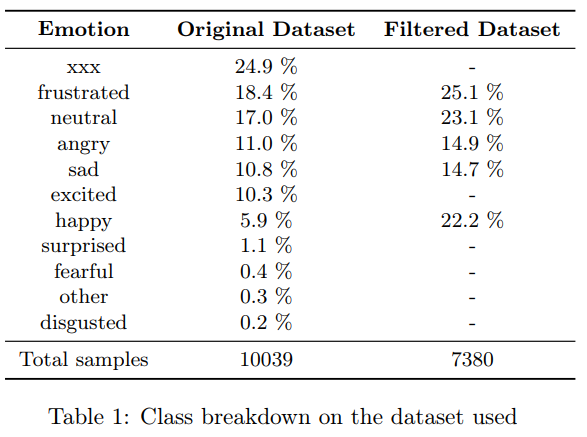

In [4]:
transcriptions_dir = "E:/IEMOCAP_full_release/Session5/transcriptions"
transcription_paths = glob.glob(f"{transcriptions_dir}/*.txt")
print(transcription_paths[:1])

['E:/IEMOCAP_full_release/Session5/transcriptions\\Ses05F_impro01.txt']


In [6]:
for path in transcription_paths:
    video_name = os.path.basename(path).split('.')[0]
    os.mkdir(f"E:/IEMOCAP_full_release/Session5/video/{video_name}")
    video = VideoFileClip(f"E:/IEMOCAP_full_release/Session5/dialog/avi/DivX/{video_name}.avi")
    with open(path, "r") as f:
        for line in f:
            if not line.startswith("Ses"):
                continue
            clip_name, time_frame, transcript = process_line(line)

            get_subclip(video, video_name, clip_name, time_frame)


An error occurred: Number of samples, -8, must be non-negative.
An error occurred: 'NoneType' object has no attribute 'stdout'
An error occurred: 'NoneType' object has no attribute 'stdout'
An error occurred: 'NoneType' object has no attribute 'stdout'
An error occurred: 'NoneType' object has no attribute 'stdout'


In [10]:
video = VideoFileClip("E:/IEMOCAP_full_release/Session5/dialog/avi/DivX/Ses05M_impro06.avi")
print(video.duration)
get_subclip(video, "Ses05M_impro06", "Ses05M_impro06_M014", (148.2300, 155.7751))

204.4
